In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1 - Define Buisness Goal

* Build a model than predict **"survived"**, **"not survived"** for the passengers of titanic given its *Passenger Class, Sex, Age, Siblings/Spouse number, Parent/Children number, Fare, Location of Embarking* (Min Accuracy: 0.78)

## Step 2 - Get the data

In [190]:
data_train = pd.read_csv('data/train.csv')

## Step 3 - Train-Test-Split

In [135]:
from sklearn.model_selection import train_test_split
# Not necessary, train.csv is already the training dataset

## Step 4 - Explore the Data

In [136]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
data_train.shape

(891, 12)

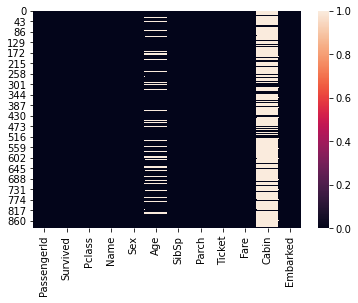

In [138]:
sns.heatmap(data_train.isna(), vmin=0, vmax=1)

In [139]:
# Check for NaN 
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

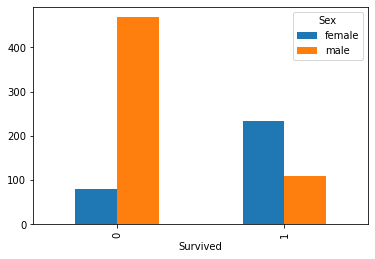

In [8]:
data_train.groupby(['Survived', 'Sex']).size().unstack(1).plot.bar()

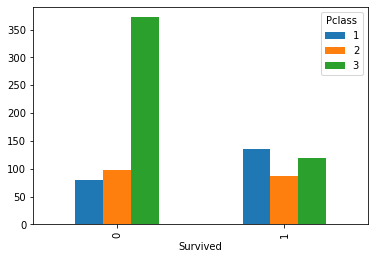

In [9]:
data_train.groupby(['Survived', 'Pclass']).size().unstack(1).plot.bar()

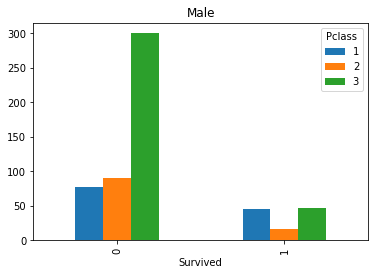

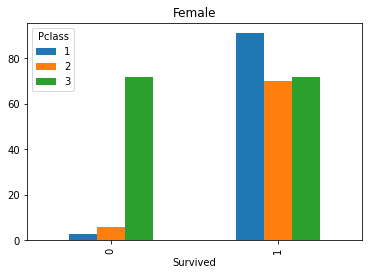

In [10]:
data_train[data_train['Sex'] == 'male'].groupby(['Survived', 'Pclass']).size().unstack(1).plot.bar(title='Male')
data_train[data_train['Sex'] == 'female'].groupby(['Survived', 'Pclass']).size().unstack(1).plot.bar(title='Female')

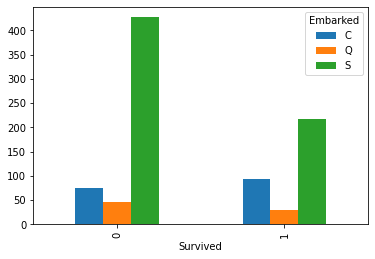

In [7]:
data_train.groupby(['Survived', 'Embarked']).size().unstack(1).plot.bar()

In [12]:
data_train.groupby('Survived')['Age', 'Fare'].agg([np.mean, np.std])

<ipython-input-12-2778ef09c60b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_train.groupby('Survived')['Age', 'Fare'].agg([np.mean, np.std])


Age                  Fare           
               mean        std       mean        std
Survived                                            
0         30.626179  14.172110  22.117887  31.388207
1         28.343690  14.950952  48.395408  66.596998

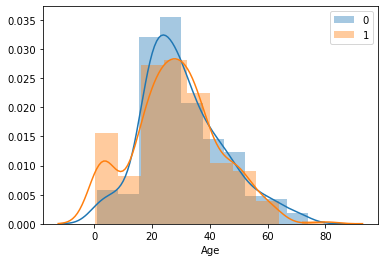

In [177]:
for outcome in data_train['Survived'].unique():
    mask = data_train['Survived'] == outcome
    sns.distplot(data_train[mask]['Age'], kde=True, label=outcome, bins=10)
    
plt.legend()

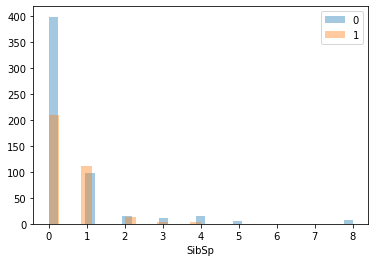

In [22]:
for outcome in data_train['Survived'].unique():
    mask = data_train['Survived'] == outcome
    sns.distplot(data_train[mask]['SibSp'], kde=False, label=outcome,)
    
plt.legend()

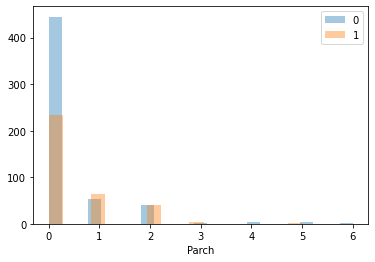

In [23]:
for outcome in data_train['Survived'].unique():
    mask = data_train['Survived'] == outcome
    sns.distplot(data_train[mask]['Parch'], kde=False, label=outcome,)
    
plt.legend()

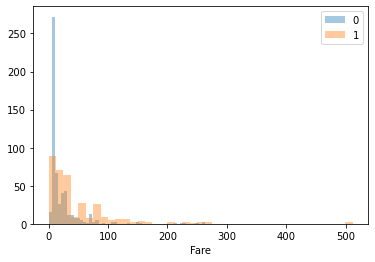

In [24]:
for outcome in data_train['Survived'].unique():
    mask = data_train['Survived'] == outcome
    sns.distplot(data_train[mask]['Fare'], kde=False, label=outcome,)
plt.legend()

# Train Model(s)

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

In [49]:
# Function for giving all evaluation stats back
def classfier_eval(y_true, y_pred):
    
    print(f' Accuracy (TP+TN/TP+TN+FN+FP): {round(accuracy_score(y_true, y_pred),2)}') 
    print(f' Precision (TP/TP+FP): {round(precision_score(y_true, y_pred),2)}')
    print(f' Recall (TP/TP+FN): {round(recall_score(y_true, y_pred),2)}')    
    print(f' F1-score (Precision*Recall/Precision+Recall): {round(f1_score(y_true, y_pred),2)}')   

In [105]:
def train_model(X_train, y_train):
    # Create model
    m = LogisticRegression(random_state=20)
    # Fitting the model
    m.fit(X_train, y_train)
    # Fitting parameters
    print(f'w0 = {round(m.intercept_[0], 2)}')
    for i in range(len(m.coef_[0])):
        print(f'w{i+1} = {round(m.coef_[0][i], 2)}')
    print()
    
    # Gives states of training model performance back
    print(classfier_eval(y_train, m.predict(X_train)))
    
    # Confusion matrix of the model PClass vs Survival
    plot_confusion_matrix(estimator=m,
                     X=X_train,
                     y_true=y_train)
    
    
    # returns model
    return m

## Step 5 - Benchmark Model

### Logistic regression on pClass only

In [106]:
# Define X and y of Model 
X = data_train[['Pclass']]
y = data_train['Survived']

w0 = 1.43
w1 = -0.84

 Accuracy (TP+TN/TP+TN+FN+FP): 0.68
 Precision (TP/TP+FP): 0.63
 Recall (TP/TP+FN): 0.4
 F1-score (Precision*Recall/Precision+Recall): 0.49
None


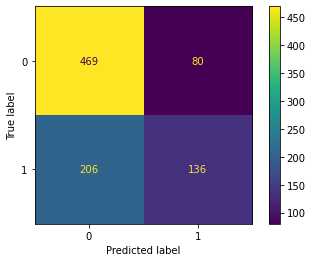

In [114]:
m_benchmark = train_model(X, y)

In [255]:
cross_val_accuracy = cross_val_score(estimator=m_benchmark
                   , X=X
                   , y=y
                   , cv=5
                   , scoring='accuracy')

In [257]:
cross_val_accuracy.mean()

0.6790973573535873

## Step 6 - Feature Engineering

In [334]:
from sklearn.compose import ColumnTransformer # Column Transformer
from sklearn.impute import SimpleImputer # Imputation
from sklearn.preprocessing import OneHotEncoder # One-Hot Encoding
from sklearn.preprocessing import KBinsDiscretizer # Binning
from sklearn.pipeline import Pipeline #  Pipeline for chaining Column Transformers
from sklearn.preprocessing import MinMaxScaler # Scaler between 0 and 1 - distribution stays the same
from sklearn.preprocessing import StandardScaler # Scaler with normal distribution - mean 0 and 1 standard deviation

In [272]:
# Define X and y of Model 
X_train = data_train.drop('Survived', axis=1)
y_train = data_train['Survived']

In [273]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Age

#### Replace NaN

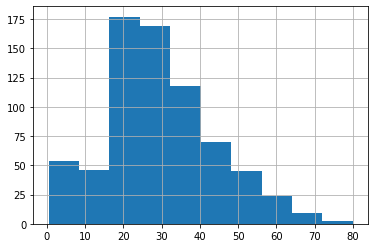

In [274]:
X_train['Age'].hist(bins=10)

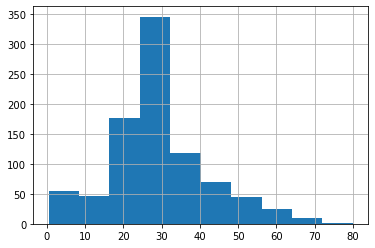

In [275]:
X_train['Age'].fillna(value=data_train['Age'].median()).hist(bins=10)

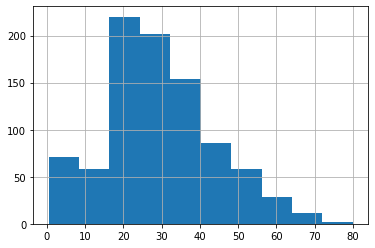

In [276]:
X_train['Age'].fillna(method='ffill').hist(bins=10) ## Forward fill seems not alter much the distribution

In [277]:
X_train['Age_ffill'] = data_train['Age'].fillna(method='ffill') ## Fill NaN with previous values

In [351]:
age_feat = KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='uniform')

In [352]:
age_feat.fit_transform(X_train[['Age_ffill']])

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [353]:
age_feat.bin_edges_

array([array([ 0.42      , 26.94666667, 53.47333333, 80.        ])],
      dtype=object)

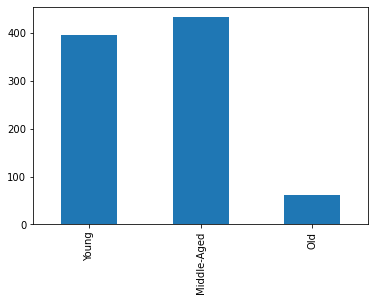

In [354]:
pd.DataFrame(age_feat.fit_transform(X_train[['Age_ffill']]), columns=['Young', 'Middle-Aged', 'Old']).sum().plot(kind='bar')

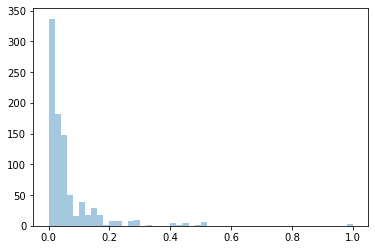

In [360]:
fare_Scaler = MinMaxScaler() #StandardScaler() 
scaled_fare = fare_Scaler.fit_transform(X_train[['Fare']])
sns.distplot(scaled_fare, kde=False)

In [370]:
pipeline_emb = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')), ('oneHot', OneHotEncoder(sparse=True))])

In [504]:
trans = ColumnTransformer([
    ('pass', 'passthrough', ['Pclass']),
    ('label_Sex', OneHotEncoder(sparse=True, drop='if_binary'), ['Sex']),
    ('do_nothing', 'passthrough', ['Parch', 'SibSp']), # Keep Parch and SibSp as it is
    #('impute and oneHot', pipeline_emb, ['Embarked']), 
    ('bins', KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='uniform'), ['Age_ffill']),
    #('scale', MinMaxScaler(), ['Fare'])
]) 

In [505]:
trans_columns = ['Pclass','Sex', 'Parch',  'SibSp', 'Young', 'Middle-Aged', 'Old']
#trans_columns = ['Parch',  'SibSp', 'C', 'Q', 'S']

In [506]:
trans.fit_transform(X_train)

array([[3., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [3., 0., 0., ..., 1., 0., 0.],
       ...,
       [3., 0., 2., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 0., 0.],
       [3., 1., 0., ..., 0., 1., 0.]])

In [507]:
X_train_feat = pd.DataFrame(trans.fit_transform(X_train), columns=trans_columns)

In [508]:
dict_emb= {'C' : 1, 'Q' : 2, 'S' : 3}

In [509]:
X_train_feat['Emb_feat'] = X_train['Embarked'].fillna(method='ffill').map(dict_emb)

In [510]:
X_train_feat.head()

,Pclass,Sex,Parch,SibSp,Young,Middle-Aged,Old,Emb_feat
0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,3
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
2,3.0,0.0,0.0,0.0,1.0,0.0,0.0,3
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3
4,3.0,1.0,0.0,0.0,0.0,1.0,0.0,3


w0 = 3.89
w1 = -0.97
w2 = -2.62
w3 = -0.04
w4 = -0.24
w5 = 0.39
w6 = 0.14
w7 = -0.53
w8 = -0.26

 Accuracy (TP+TN/TP+TN+FN+FP): 0.8
 Precision (TP/TP+FP): 0.75
 Recall (TP/TP+FN): 0.7
 F1-score (Precision*Recall/Precision+Recall): 0.73
None


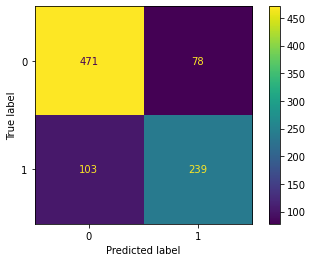

In [511]:
m_feature = train_model(X_train_feat, y_train)

In [512]:
cross_val_feature_acc = cross_val_score(estimator=m_benchmark
                   , X=X_train_feat
                   , y=y_train
                   , cv=5
                   , scoring='accuracy')

In [513]:
cross_val_feature_pre = cross_val_score(estimator=m_benchmark
                   , X=X_train_feat
                   , y=y_train
                   , cv=5
                   , scoring='precision')

In [514]:
print(cross_val_feature_acc.mean())
print(cross_val_feature_pre.mean())

0.7923608059757704
0.749739044168392


## Test on test data

In [454]:
data_test = pd.read_csv('data/test.csv')

In [455]:
data_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [456]:
data_test['Age_ffill'] = data_test['Age'].fillna(method='ffill')

In [457]:
X_test_feat = pd.DataFrame(trans.transform(X_test), columns=trans_columns)

In [458]:
X_test_feat['Emb_feat'] = X_test['Embarked'].fillna(method='ffill').map(dict_emb)

In [459]:
outcome = pd.DataFrame({'PassengerId' : data_test['PassengerId'], 'Survived' : m_feature.predict(X_test_feat)})
outcome.set_index('PassengerId', inplace=True)

In [460]:
outcome.to_csv('data/outcome.csv')